# **[Sartorius - Cell Instance Segmentation](https://www.kaggle.com/c/sartorius-cell-instance-segmentation)**
**Detect single neuronal cells in microscopy images**

Great thanks are due to [Yaroslav Isaienkov](https://www.kaggle.com/ihelon) for sharing [the notebook](https://www.kaggle.com/ihelon/cell-segmentation-run-length-decoding).

In [ ]:
import numpy as np
import pandas as pd
import os

import cv2
import tifffile
import matplotlib.pyplot as plt
import seaborn as sns
import json

# **Purpose**

Purpose is to detedt neuronal cells in the phase contrast microscopy images.

# **Data Exploration**

In the data, there are four folders and two files. The two filea are "sample_submission.csv" and "train.csv". Let's explore the items one by one from simple one to complicated one.

In [ ]:
INPUT = '../input/sartorius-cell-instance-segmentation'
os.listdir(INPUT)

# **sample_submission.csv file**

There are three image "id" names.

In [ ]:
df_sample_submission = pd.read_csv('../input/sartorius-cell-instance-segmentation/sample_submission.csv')

In [ ]:
def see_df(df):
    print('shape: ', df.shape)
    print('columns: ', df.columns)
    display(df.head(3).style.set_properties(**{'background-color': 'black', 'color': 'lawngreen','border': '1.5px  solid white'}))
see_df(df_sample_submission)

# **train.csv file**

There are 606 unique image "id" names among the 73585 items in the file. There are three types of "cell_type" names: 'shsy5y', 'astro', and 'cort'.

In [ ]:
df_train = pd.read_csv('../input/sartorius-cell-instance-segmentation/train.csv')

In [ ]:
see_df(df_train)

In [ ]:
print('the number of unique id: ', len(df_train['id'].unique()))
print('the number of unique width: ', len(df_train['width'].unique()))
print('the number of unique height: ', len(df_train['height'].unique()))
print('the number of unique cell_type: ', len(df_train['cell_type'].unique()))
print('the number of unique sample_id: ', len(df_train['sample_id'].unique()))

In [ ]:
print('unique cell_type items: ', df_train['cell_type'].unique())
df_train['cell_type'].hist()

In [ ]:
unique_ids = df_train['id'].unique()

unique_images = pd.DataFrame({
    'id': unique_ids,
    'shsy5y': unique_ids,
    'astro': unique_ids,
    'cort': unique_ids,
    'total': unique_ids
})


for i in range(len(unique_images)):
    list = df_train[df_train["id"] == unique_images.loc[i, 'id']]["cell_type"].tolist()
#     print(list.count('shsy5y'), list.count('astro'), list.count('cort'))
    unique_images.loc[i, 'shsy5y'] = list.count('shsy5y')
    unique_images.loc[i, 'astro'] = list.count('astro')
    unique_images.loc[i, 'cort'] = list.count('cort')
    unique_images.loc[i, 'total'] = len(list)

see_df(unique_images)

Each image has only one cell type. That is, there is no mixed cell-type image.

In [ ]:
sns.jointplot(x=unique_images['shsy5y']/unique_images['total'], y=unique_images['astro']/unique_images['total'], kind="kde")
sns.jointplot(x=unique_images['shsy5y']/unique_images['total'], y=unique_images['cort']/unique_images['total'], kind="kde")
sns.jointplot(x=unique_images['astro']/unique_images['total'], y=unique_images['cort']/unique_images['total'], kind="kde")


# **test folder**

There are three png image files in the test folder. Of course the file names are consistent with the items in the sample_submission.csv file.

In [ ]:
content = ['LIVECell_dataset_2021', 'test', 'train', 'train_semi_supervised']
i = 1
print(content[i], ': ', os.listdir(INPUT + '/' + content[i]))

In [ ]:
print('An exmaple image')
(i, j) = (1, 2)
image = cv2.imread(INPUT + '/' + content[i] + '/' + os.listdir(INPUT + '/' + content[i])[j])

plt.figure(figsize=(16, 32))
plt.title(content[i] + '/' + os.listdir(INPUT + '/' + content[i])[j])
plt.imshow(image)
plt.axis("off")
    
plt.show();

# **train folder**

In the train folder, there are 606 png files. The unique id items in the train.csv file matches the 606 file names.

In [ ]:
i = 2
# print(content[i], ': ', os.listdir(INPUT + '/' + content[i]))
print(content[i], ': ', len(os.listdir(INPUT + '/' + content[i])))

In [ ]:
print('An exmaple image')
(i, j) = (2, 605)
image = cv2.imread(INPUT + '/' + content[i] + '/' + os.listdir(INPUT + '/' + content[i])[j])

plt.figure(figsize=(16, 32))
plt.title(content[i] + '/' + os.listdir(INPUT + '/' + content[i])[j])
plt.imshow(image)
plt.axis("off")
    
plt.show();

# **train_semi_supervised folder**

In the train_semi_supervised folder, there are 1972 png image files.

In [ ]:
i = 3
# print(content[i], ': ', os.listdir(INPUT + '/' + content[i]))
print(content[i], ': ', len(os.listdir(INPUT + '/' + content[i])))

In [ ]:
print('An exmaple image')
(i, j) = (3, 0)
image = cv2.imread(INPUT + '/' + content[i] + '/' + os.listdir(INPUT + '/' + content[i])[j])
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16, 32))
plt.title(content[i] + '/' + os.listdir(INPUT + '/' + content[i])[j])
plt.imshow(image)
plt.axis("off")
    
plt.show();

# **LIVECell_dataset_2021 folder**

The sub-folder structure in the "LIVECell_dataset_2021" folder is as follows:

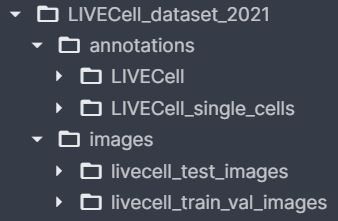

* images folder

In each of the "livecell_test_images" and "livecell_train_val_images" folders, there are nine sub-folders as follows.

In [ ]:
content_livecell_test_images = np.sort(os.listdir('../input/sartorius-cell-instance-segmentation/LIVECell_dataset_2021/images/livecell_test_images'))
content_livecell_train_val_images = np.sort(os.listdir('../input/sartorius-cell-instance-segmentation/LIVECell_dataset_2021/images/livecell_train_val_images'))
print('livecell_test_images:      ', content_livecell_test_images)
print('livecell_train_val_images: ', content_livecell_train_val_images)

In [ ]:
print('livecell_test_images')
for i in range(9):
    dir_name = '../input/sartorius-cell-instance-segmentation/LIVECell_dataset_2021/images/livecell_test_images/' + content_livecell_test_images[i]
    print('    ', content_livecell_test_images[i], ': ', len(os.listdir(dir_name)), 'files')

print('    ')
print('livecell_train_val_images')
for i in range(9):
    dir_name = '../input/sartorius-cell-instance-segmentation/LIVECell_dataset_2021/images/livecell_train_val_images/' + content_livecell_train_val_images[i]
    print('    ', content_livecell_train_val_images[i], ': ', len(os.listdir(dir_name)), 'files')


In [ ]:
dir_name = '../input/sartorius-cell-instance-segmentation/LIVECell_dataset_2021/images/livecell_test_images/' + content_livecell_test_images[6]

print('An exmaple image')
image = tifffile.imread(dir_name + '/' + os.listdir(dir_name)[0])

plt.figure(figsize=(16, 32))
plt.title(os.listdir(dir_name)[0])
plt.imshow(image)
plt.axis("off")
    
plt.show();

* annotations folder

In the annotations folder, there are two sub-folders: LIVECell and LIVECell_single_cells.

In [ ]:
os.listdir('../input/sartorius-cell-instance-segmentation/LIVECell_dataset_2021/annotations')

In the LIVECell folder, there are three filles as follows.

In [ ]:
os.listdir('../input/sartorius-cell-instance-segmentation/LIVECell_dataset_2021/annotations/LIVECell')

In the LIVECell_single_cells folder, there are eight sub-folders as follows.

In [ ]:
content_LIVECell_single_cells = os.listdir('../input/sartorius-cell-instance-segmentation/LIVECell_dataset_2021/annotations/LIVECell_single_cells')
print('LIVECell_single_cells:      ', content_LIVECell_single_cells)

In [ ]:
print('LIVECell_single_cells')
for i in range(8):
    dir_name = '../input/sartorius-cell-instance-segmentation/LIVECell_dataset_2021/annotations/LIVECell_single_cells/' + content_LIVECell_single_cells[i]
    print('    ', content_LIVECell_single_cells[i], ': ', len(os.listdir(dir_name)), 'files')


# **Exploring the masks in the training images**
ref: https://www.kaggle.com/ihelon/cell-segmentation-run-length-decoding

The following examples are SH-SY5Y, astrocytes, and cortex(?).

In [ ]:
# ref: https://www.kaggle.com/ihelon/cell-segmentation-run-length-decoding
# ref: https://www.kaggle.com/inversion/run-length-decoding-quick-start
def rle_decode(mask_rle, shape, color=1):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros((shape[0] * shape[1], shape[2]), dtype=np.float32)
    for lo, hi in zip(starts, ends):
        img[lo : hi] = color
    return img.reshape(shape)

In [ ]:
# ref: https://www.kaggle.com/ihelon/cell-segmentation-run-length-decoding
# slightly modified
def plot_masks(image_id, colors=True):
    labels = df_train[df_train["id"] == image_id]["annotation"].tolist()
    cell_types = df_train[df_train["id"] == image_id]["cell_type"].values # added
    print('masked cells: ', len(labels), cell_types[0])                   # added

    if colors:
        mask = np.zeros((520, 704, 3))
        for label in labels:
            mask += rle_decode(label, shape=(520, 704, 3), color=np.random.rand(3))
    else:
        mask = np.zeros((520, 704, 1))
        for label in labels:
            mask += rle_decode(label, shape=(520, 704, 1))
    mask = mask.clip(0, 1)

    image = cv2.imread(f"../input/sartorius-cell-instance-segmentation/train/{image_id}.png")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(16, 32))
    plt.subplot(3, 1, 1)
    plt.imshow(image)
    plt.axis("off")
    plt.subplot(3, 1, 2)
    plt.imshow(image)
    plt.imshow(mask, alpha=0.5)
    plt.axis("off")
    plt.subplot(3, 1, 3)
    plt.imshow(mask)
    plt.axis("off")
    
    plt.show();

In [ ]:
plot_masks(unique_images.id[0], colors=True)

In [ ]:
plot_masks(unique_images.id[1], colors=True)

In [ ]:
plot_masks(unique_images.id[2], colors=True)

The SH-SY5Y and astrocytes seem to be really challenging.